Build a regression model.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df_features = pd.read_csv("../data/features.csv")
df_features

,fsq_restaurant_number,Fsq_avg_distance,Fsq_avg_price,Fsq_avg_rating,Yelp_avg_distance,Yelp_avg_rating,free_bikes
0,10,340.800000,1.700000,8.110000,114.116580,5.25,9
1,10,127.900000,2.400000,8.460000,72.505704,6.45,4
2,10,293.400000,2.111111,8.790000,135.501846,6.25,10
3,10,386.400000,1.600000,8.170000,166.849287,6.55,6
4,10,295.300000,1.875000,7.833333,132.465398,7.35,12
...,...,...,...,...,...,...,...
240,10,545.100000,1.285714,6.571429,592.076413,6.25,4
241,10,350.200000,1.888889,8.290000,250.578418,7.40,18
242,7,129.714286,1.571429,6.785714,103.712860,7.20,5
243,2,257.500000,2.000000,7.750000,291.967091,7.15,1


In [8]:
# Create a new DataFrame with predictors (Yelp_avg_distance) and the target variable (free_bikes)
predictors = df_features[[ 'Yelp_avg_distance']]
target = df_features['free_bikes']

# Add a constant term to the predictors
predictors = sm.add_constant(predictors)

# Create a linear regression model
model = sm.OLS(target, predictors)

# Fit the model
results = model.fit()



Provide model output and an interpretation of the results. 

In [9]:
# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.586
Date:                Mon, 25 Sep 2023   Prob (F-statistic):              0.209
Time:                        07:48:42   Log-Likelihood:                -762.59
No. Observations:                 245   AIC:                             1529.
Df Residuals:                     243   BIC:                             1536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.0978      0.63

### R-Squared
R-squared  which is the measurement of how much of the targed variable is explained by changes in our model predictor. R-squared value of explains how the dependent variable explains the bike availability

### Adj. R-Squared
adjusted R-squared is very close to the R-squared. This could be because we are only using one feature in our model


### Null Hypothesis (H0): 
The number of available bikes at a specific location is not significantly affected by the average distance of restaurants from that bikestation

### Alternative Hypothesis (H1): 
The number of available bikes at a specific location is significantly affected by the average distance of restaurants from thatbikestation


### Pvalue:
The value of p-values is greater than 0.05. This implies that there is insufficient evidence to reject the null hypothesis. This implies that the average distance of restaurants from bikestation might not significantly influence the number of available bikes in that bike station

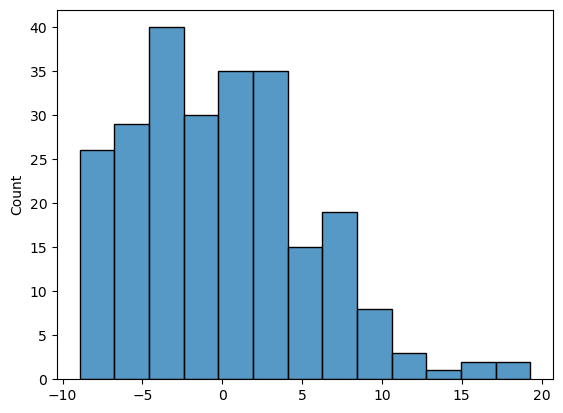

In [10]:
residuals = results.resid

sns.histplot(residuals)
plt.show()

In [12]:
results.params

const                9.097848
Yelp_avg_distance   -0.002545
dtype: float64

# Stretch

How can you turn the regression model into a classification model?